### Attribute Information:

Age: Any ages in years when a women during pregnant.

SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.

DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.

BS: Blood glucose levels is in terms of a molar concentration, mmol/L.

HeartRate: A normal resting heart rate in beats per minute.

Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

Age, Systolic Blood Pressure as SystolicBP, Diastolic BP as DiastolicBP, Blood Sugar as BS, Body Temperature as BodyTemp, HeartRate and RiskLevel. All these are the responsible and significant risk factors for maternal mortality, that is one of the main concern of SDG of UN. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
df.shape

(1014, 7)

In [8]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [9]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

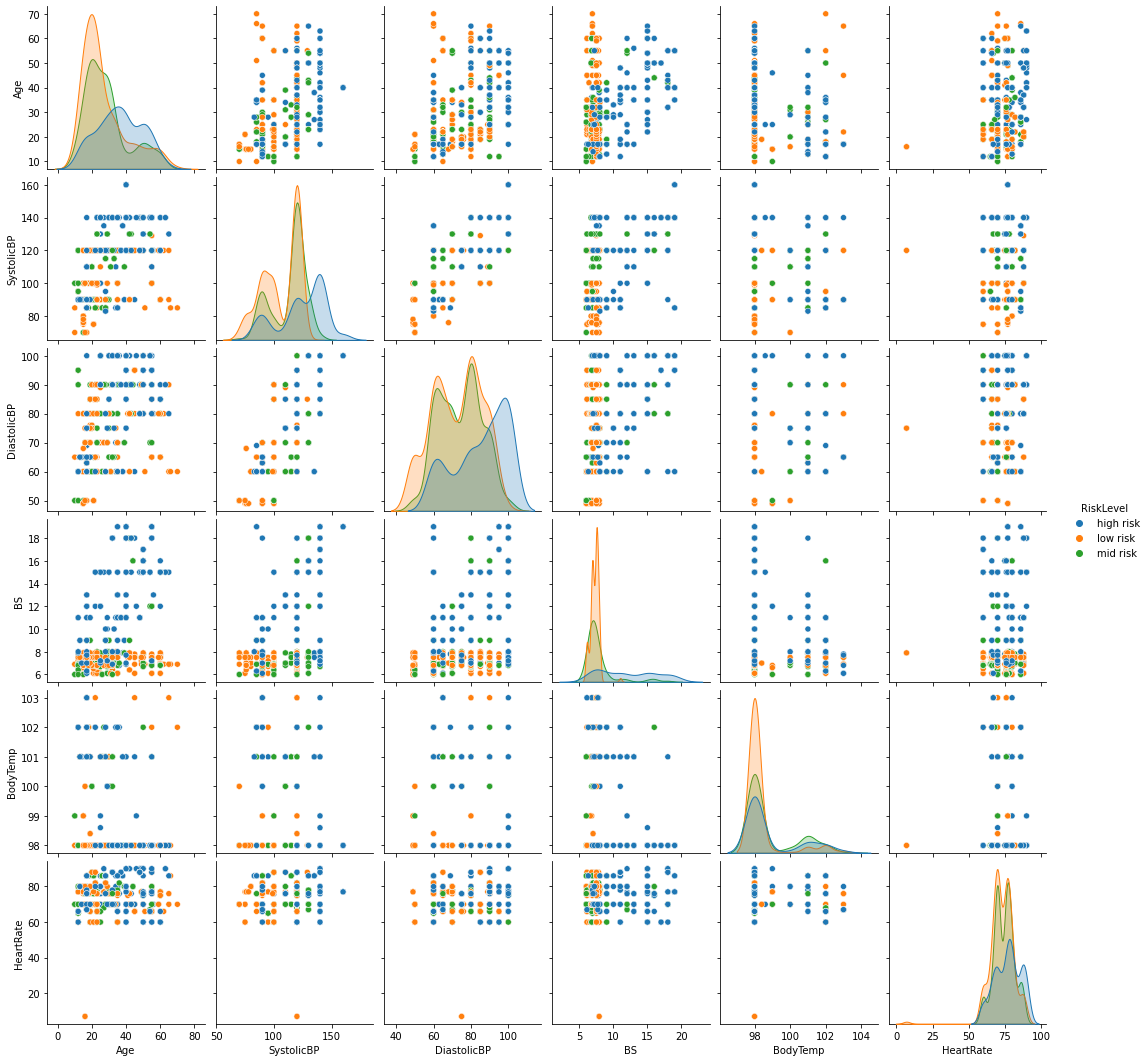

In [10]:
sns.pairplot(df,hue='RiskLevel')

C:\Users\bhatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

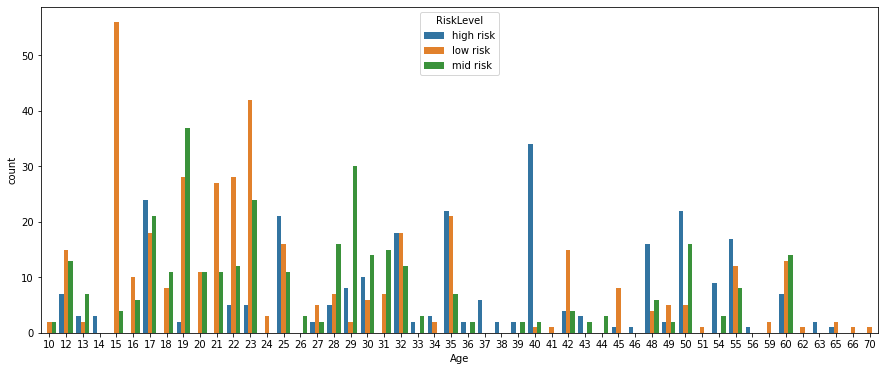

In [11]:
plt.figure(figsize=(15,6))
sns.countplot('Age',hue='RiskLevel',data=df)

### Observation

1. girl with 17 year of age have high risk of maternal mortility

<AxesSubplot:ylabel='RiskLevel'>

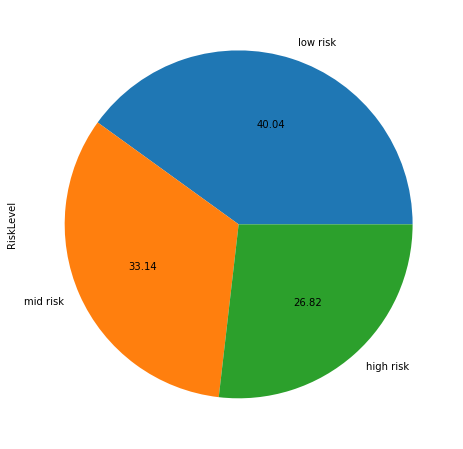

In [12]:
df['RiskLevel'].value_counts().plot.pie(autopct='%.2f',figsize=(8,8))

<AxesSubplot:>

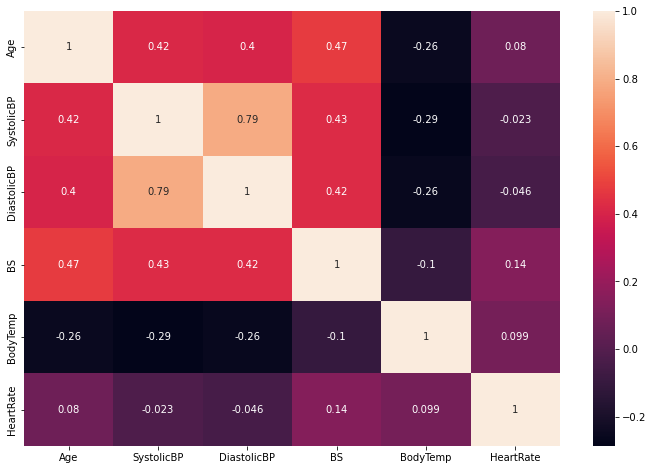

In [13]:
correlation =df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot =True)

In [14]:
df['RiskLevel']=df['RiskLevel'].map({'low risk':0,'mid risk':1,'high risk':2})

<AxesSubplot:xlabel='Age', ylabel='Count'>

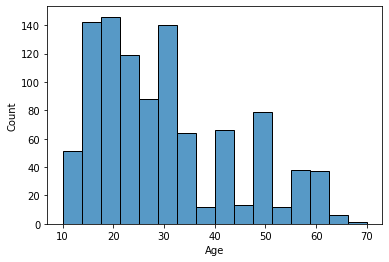

In [15]:
sns.histplot(df['Age'],)

C:\Users\bhatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiastolicBP', ylabel='SystolicBP'>

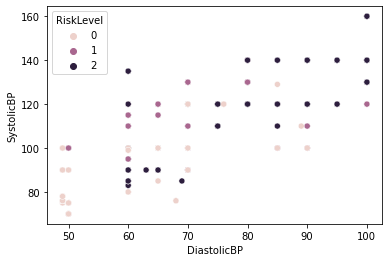

In [16]:
sns.scatterplot('DiastolicBP','SystolicBP',hue='RiskLevel',data=df)

C:\Users\bhatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RiskLevel', ylabel='BS'>

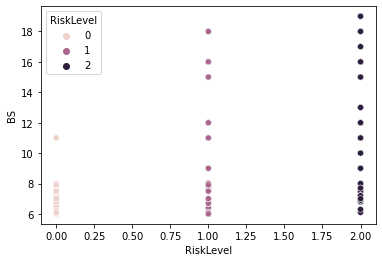

In [17]:
sns.scatterplot('RiskLevel','BS',hue='RiskLevel',data=df)

C:\Users\bhatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='BS'>

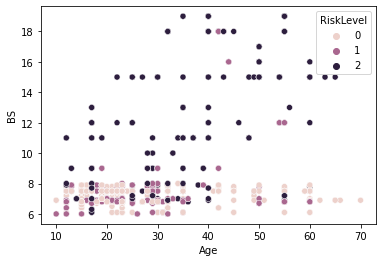

In [18]:
sns.scatterplot('Age','BS',hue='RiskLevel',data=df)

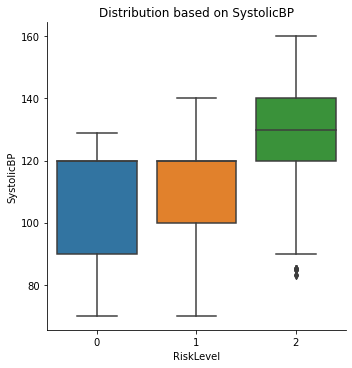

In [19]:
sns.catplot(x="RiskLevel", y="SystolicBP", data=df, kind="box").set(title="Distribution based on SystolicBP")

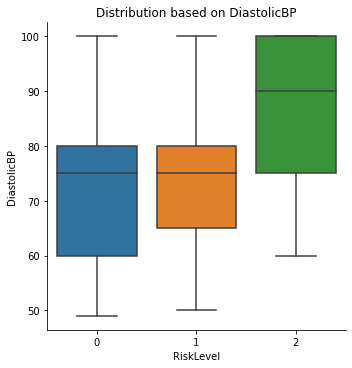

In [20]:
sns.catplot(x="RiskLevel", y="DiastolicBP", data=df, kind="box").set(title="Distribution based on DiastolicBP")

In [21]:
X= df.drop('RiskLevel',axis=1)
y= df['RiskLevel']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
X_train.size

4560

In [24]:
X_test.size

1524

In [25]:
y_train.value_counts()

0    311
1    244
2    205
Name: RiskLevel, dtype: int64

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
pred= model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<AxesSubplot:>

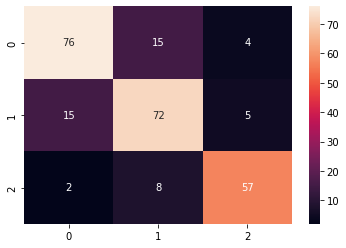

In [30]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        95
           1       0.76      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



In [32]:
from sklearn.preprocessing import StandardScaler    
scale = StandardScaler()  
X_train= scale.fit_transform(X_train)    
X_test= scale.transform(X_test) 

In [33]:
X_train

array([[-0.60158195,  0.36677854,  0.25283285, -0.55181494,  3.07668957,
         0.19721219],
       [-0.97100848, -1.27615872, -0.83853197, -0.30466871,  3.07668957,
        -0.89239313],
       [-0.52769664,  1.46207005,  0.98040939, -0.58270822, -0.49582781,
        -0.52919136],
       ...,
       [-0.45381133,  0.36677854,  0.25283285, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.35892704, -0.72851297, -0.47474369, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.13727112,  1.46207005,  1.70798594, -0.55181494, -0.49582781,
         0.43934671]])

In [34]:
model5= DecisionTreeClassifier(criterion='gini', random_state=20)  
model5.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=20)

In [35]:
y_pred= model5.predict(X_test)  

In [36]:
from sklearn.metrics import plot_confusion_matrix

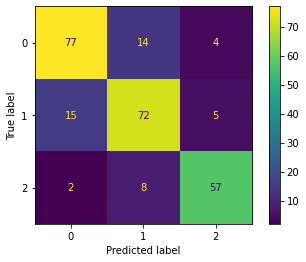

In [37]:
plot_confusion_matrix(model5,X_test,y_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RF= RandomForestClassifier(criterion='gini')

In [41]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
predict=RF.predict(X_test)

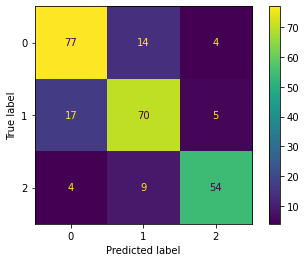

In [43]:
plot_confusion_matrix(RF,X_test,y_test)

In [44]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        95
           1       0.75      0.76      0.76        92
           2       0.86      0.81      0.83        67

    accuracy                           0.79       254
   macro avg       0.80      0.79      0.80       254
weighted avg       0.79      0.79      0.79       254



In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
import math

In [47]:
math.sqrt(len(y_test))

15.937377450509228

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
knn_pred=knn.predict(X_test)

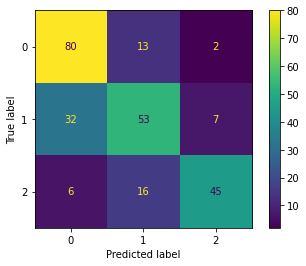

In [51]:
plot_confusion_matrix(knn,X_test,y_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [53]:
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier()

In [55]:
xgb.fit(X_train,y_train)

[20:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bhatt\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
xbg_pred=xgb.predict(X_test)

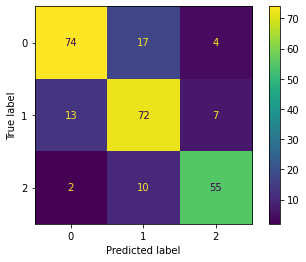

In [57]:
plot_confusion_matrix(xgb,X_test,y_test)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [59]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid = {
    "learning_rate": [0.5,1,3,5],
    "reg_lambda": [0, 1,5, 10,20]
}

In [124]:
grid = GridSearchCV(xgb, param_grid,cv=3, scoring="roc_auc", n_jobs=-1)

In [125]:
grid.fit(X_train,y_train)

C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
C:\Users\bhatt\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                     

In [126]:
grid.best_params_

{'learning_rate': 0.5, 'reg_lambda': 0}

In [91]:
grid.best_score_

nan

In [127]:
xgb = XGBClassifier(colsample_bytree= 0.5,gamma=0,learning_rate=0.1,max_depth=3,subsample=0.8,reg_lambda=0)

In [128]:
xgb.fit(X_train,y_train)

[21:39:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
xgb_pred=xgb.predict(X_test)

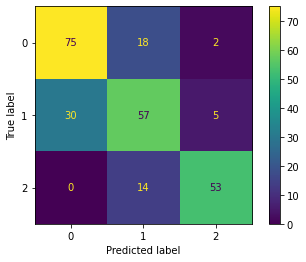

In [130]:
plot_confusion_matrix(xgb,X_test,y_test)

In [144]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        95
           1       0.64      0.62      0.63        92
           2       0.88      0.79      0.83        67

    accuracy                           0.73       254
   macro avg       0.75      0.73      0.74       254
weighted avg       0.73      0.73      0.73       254



In [148]:
param_grid={'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,15,20,30],
    'criterion' :['gini', 'entropy']
    
}

In [149]:
gridsearchcv=GridSearchCV(RF,param_grid,cv=5)

In [150]:
gridsearchcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [151]:
gridsearchcv.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 500}

In [152]:
gridsearchcv.best_score_

0.8631578947368421

In [158]:
RF2= RandomForestClassifier(criterion='entropy',max_depth=30,max_features='auto',n_estimators=500)

In [159]:
RF2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=500)

In [160]:
rf_pred=RF2.predict(X_test)

In [161]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        95
           1       0.75      0.79      0.77        92
           2       0.86      0.81      0.83        67

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



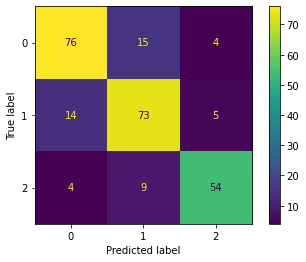

In [162]:
plot_confusion_matrix(RF2,X_test,y_test)

In [163]:
from sklearn.svm import SVC

In [203]:
svc= SVC(kernel='poly')

In [204]:
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [205]:
svc_pred=svc.predict(X_test)

In [206]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        95
           1       0.75      0.79      0.77        92
           2       0.86      0.81      0.83        67

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254

